Graphs for Fig 4, model panels

Test noise: 1, 2, 4, 8, 16, 32, 64...

In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from skmisc.loess import loess
from scipy.signal import find_peaks
import warnings

%matplotlib inline
warnings.simplefilter(action='ignore')

In [386]:
# Setup
s = 'e'
noise_levels = [2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20]

path_UTGeff_single = '../out_batch/batch_2023-04-26_13-33-24__MANUSCRIPT_UTGeffv1_single/'
path_UTGeff_multi = '../out_batch/batch_2023-04-25_22-52-42__MANUSCRIPT_UTGeffv1_multi/'

UTGeff_single = pd.read_csv(path_UTGeff_single + 'auxin_profile_0_' + s + '.csv').head(13)

data_UTGeff = [
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_2.5_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_5_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_7.5_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_10_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_12.5_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_15_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_17.5_' + s + '.csv'),
    pd.read_csv(path_UTGeff_multi + 'auxin_profile_multiple_20_' + s + '.csv')
]

path_DUAL_single = '../out_batch/batch_2023-04-28_08-49-52__MANUSCRIPT_DUALv4_single/'
path_DUAL_multi = '../out_batch/batch_2023-04-27_14-12-06__MANUSCRIPT_DUALv4_multi/'

DUAL_single = pd.read_csv(path_DUAL_single + 'auxin_profile_0_' + s + '.csv').head(13)

data_DUAL = [
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_2.5_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_5_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_7.5_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_10_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_12.5_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_15_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_17.5_' + s + '.csv'),
    pd.read_csv(path_DUAL_multi + 'auxin_profile_multiple_20_' + s + '.csv')
]

In [372]:
# Process datasets UTGeff

# Select first 13 rows only (aimpler options did not update dfs in list, see: https://stackoverflow.com/questions/49986865/modifying-dataframes-inside-a-list-is-not-working)
for i, df in enumerate(data_UTGeff): data_UTGeff[i] = df.head(13)

# Add key column indicating model
for i, df in enumerate(data_UTGeff): data_UTGeff[i]['model'] = 'UTGeff'

# Add key column indicating noise level
for i, df in enumerate(data_UTGeff): data_UTGeff[i]['noise'] = noise_levels[i]

# Give x values (cell row) to all datasets
data_x = np.linspace(1, len(data_UTGeff[0].index), len(data_UTGeff[0].index))
for i, df in enumerate(data_UTGeff): data_UTGeff[i]['x'] = data_x

# Calculate mean and median of profiles replicates
all_means_UTGeff = [i.drop(columns=['x']).mean(axis=1) for i in data_UTGeff]
all_medians_UTGeff = [i.drop(columns=['x']).median(axis=1) for i in data_UTGeff]

data_UTGeff[3]

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,model,noise,x
0,389.309500,256.524908,304.912110,288.940747,206.952869,431.268814,109.668287,296.714630,445.239249,243.479074,...,390.964489,404.267701,144.653291,462.583957,479.670786,411.488933,357.655655,UTGeff,10,1.0
1,245.711027,260.222208,263.861974,234.764415,230.153831,248.470780,239.530898,236.292700,252.237150,261.186928,...,264.604847,235.824458,239.549763,259.390120,247.475531,238.347367,268.030405,UTGeff,10,2.0
2,70.285563,87.543472,94.624217,101.415799,110.767433,123.158230,102.256901,101.031023,101.203218,113.960980,...,112.729852,79.953020,148.234024,116.853593,86.390603,76.306313,95.221548,UTGeff,10,3.0
3,16.997189,20.431193,20.816806,27.140494,25.944905,37.639848,26.238491,27.225123,27.322335,30.203813,...,37.974936,23.476311,62.347440,33.876535,27.841487,18.454665,25.413830,UTGeff,10,4.0
4,6.188809,5.478467,6.415298,6.870273,7.586849,8.478125,6.860230,7.081956,6.709484,7.276596,...,10.061300,7.300331,15.560802,8.263987,7.623678,5.288072,6.305762,UTGeff,10,5.0
5,8.926795,4.014393,5.112076,4.577489,13.084513,4.569227,5.493808,5.056271,6.890663,7.952255,...,6.254963,4.941674,6.232568,6.832891,5.696654,5.587803,4.294406,UTGeff,10,6.0
6,34.415028,10.356775,12.488038,15.847970,56.972373,12.230783,19.864330,10.043057,26.238135,34.145314,...,21.539346,10.437054,11.389800,22.602652,13.610697,17.678192,11.171392,UTGeff,10,7.0
7,89.032494,14.648513,21.723145,44.524311,145.683933,22.007450,57.389865,21.689165,70.130333,91.038175,...,62.207332,23.842032,26.853393,62.263499,26.996860,43.535377,24.214307,UTGeff,10,8.0
8,57.311712,12.786018,51.982982,62.070217,140.403436,23.584901,119.830518,35.092468,139.948896,161.474807,...,90.108257,34.516661,56.905210,84.481976,43.806451,67.186145,32.294988,UTGeff,10,9.0
9,37.177747,16.976995,100.929401,91.661785,65.753235,37.181353,95.694829,60.888542,160.867405,88.163479,...,129.065586,52.750570,83.124318,117.451900,65.992253,131.002369,44.943172,UTGeff,10,10.0


In [373]:
# Process datasets DUAL

# Select first 13 rows only (aimpler options did not update dfs in list, see: https://stackoverflow.com/questions/49986865/modifying-dataframes-inside-a-list-is-not-working)
for i, df in enumerate(data_DUAL): data_DUAL[i] = df.head(13)

# Add key conlumn indicating model
for i, df in enumerate(data_DUAL): data_DUAL[i]['model'] = 'UTGeff'

# Add key column indicating noise level
for i, df in enumerate(data_DUAL): data_DUAL[i]['noise'] = noise_levels[i]

# Give x values (cell row) to all datasets
data_x = np.linspace(1, len(data_DUAL[0].index), len(data_DUAL[0].index))
for i, df in enumerate(data_DUAL): data_DUAL[i]['x'] = data_x

# Calculate mean and median of profiles replicates
all_means_DUAL = [i.drop(columns=['x']).mean(axis=1) for i in data_DUAL]
all_medians_DUAL = [i.drop(columns=['x']).median(axis=1) for i in data_DUAL]

data_DUAL[0]

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,model,noise,x
0,302.572704,286.499598,289.131117,304.197039,311.936054,273.523809,288.190907,280.844561,288.795799,292.122132,...,282.792453,285.386204,280.489127,299.730127,296.619606,273.031824,299.908608,UTGeff,2.5,1.0
1,243.640100,245.315626,245.146992,240.541861,250.290385,249.069662,248.536793,246.050350,240.193612,243.067660,...,243.215444,241.293661,242.221701,242.290357,247.833998,245.754564,248.865650,UTGeff,2.5,2.0
2,136.353162,128.261476,132.123115,131.923162,128.330929,132.054396,128.919670,131.840408,125.724792,125.462647,...,119.414846,131.510139,135.480558,132.188370,126.721290,129.916440,134.550030,UTGeff,2.5,3.0
3,64.566412,64.768882,62.989556,66.139701,68.955400,64.306157,67.061710,66.298703,40.639314,60.843580,...,37.667980,68.945702,71.574642,67.159115,66.301993,68.657901,69.652197,UTGeff,2.5,4.0
4,33.600691,35.843762,24.309200,34.051236,26.346898,26.015078,38.712169,35.748867,35.412932,35.204900,...,28.939598,35.258367,35.505317,39.309971,25.937190,35.157882,36.749521,UTGeff,2.5,5.0
5,36.330156,39.776539,33.275479,36.788814,34.504139,31.825360,51.527168,38.611864,34.645956,37.425643,...,46.008676,38.949567,43.029541,39.238694,33.265404,43.043056,39.658056,UTGeff,2.5,6.0
6,30.323283,48.092091,40.187673,42.518517,43.525275,32.347948,51.908973,47.393782,34.020233,44.506962,...,50.376533,43.998989,35.438883,36.798084,34.403087,35.232809,37.553146,UTGeff,2.5,7.0
7,33.532686,71.615601,62.430332,64.907166,68.697194,61.119820,81.645229,71.306917,65.159404,63.905724,...,71.431213,59.892805,43.564931,46.457023,61.983920,49.012229,48.197055,UTGeff,2.5,8.0
8,55.418039,222.043050,199.527417,207.241765,215.512411,201.224757,231.155586,223.285994,207.393242,209.827896,...,225.001506,167.006399,84.167822,94.053704,200.706596,97.117658,89.498859,UTGeff,2.5,9.0
9,49.463246,142.229095,133.714341,137.049548,134.886707,132.374955,169.758337,155.360621,125.256995,131.973799,...,155.461506,115.790686,85.245349,95.949175,131.239836,97.447983,88.591611,UTGeff,2.5,10.0


In [374]:
# Make figure 2 (individual plots)

def make_individual_plot(sample1_single=None, sample2_single=None, sample_multi1=None, sample_multi2=None, mean=None, x=data_x, loess=None):

    fig2, ax1 = plt.subplots(1,1, figsize=(2.5,4))

    ax1.plot(sample1_single['0'], sample1_single['x'], color='blue')
    ax1.plot(sample2_single['0'], sample2_single['x'], color='red')

    #for col in sample_multi.drop(columns=['x']):
        #ax1.plot(sample_multi[col], sample_multi['x'], color='blue', alpha=.15)

    #ax1.fill_betweenx(loess['x'], loess['ymin'], loess['ymax'], alpha=.2, color='blue', linewidth=0)

    #ax1.plot(mean, data_x, color='blue')

    ax1.set_xlim(-10,350) 
    ax1.set_yticks([1,4,7,10,13])
    ax1.invert_yaxis()
    plt.xlabel('[Auxin] (A.U.)')
    plt.ylabel('Cell row')
    #fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_comapre.png', bbox_inches='tight')
    #fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_compare.svg', bbox_inches='tight')

    plt.show()

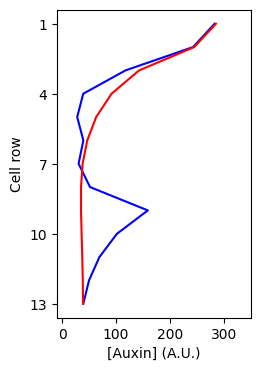

In [375]:
wt = pd.read_csv('../out_batch/batch_2023-04-28_08-49-52__MANUSCRIPT_DUALv4_single/auxin_profile_0_a.csv').head(13)
wt['x'] = data_x
cuc = pd.read_csv('../out_batch/batch_2023-04-28_08-49-52__MANUSCRIPT_DUALv4_single/auxin_profile_0_b.csv').head(13)
wt['x'], cuc['x'] = data_x, data_x

make_individual_plot(sample1_single=wt, sample2_single=cuc)

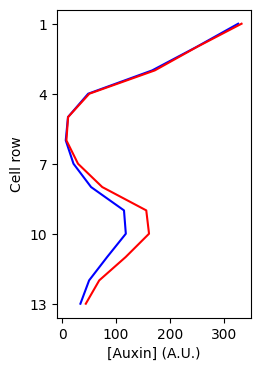

In [376]:
wt = pd.read_csv('../out_batch/batch_2023-04-26_13-33-24__MANUSCRIPT_UTGeffv1_single/auxin_profile_0_a.csv').head(13)
wt['x'] = data_x
cuc = pd.read_csv('../out_batch/batch_2023-04-26_13-33-24__MANUSCRIPT_UTGeffv1_single/auxin_profile_0_c.csv').head(13)
wt['x'], cuc['x'] = data_x, data_x

make_individual_plot(sample1_single=wt, sample2_single=cuc)

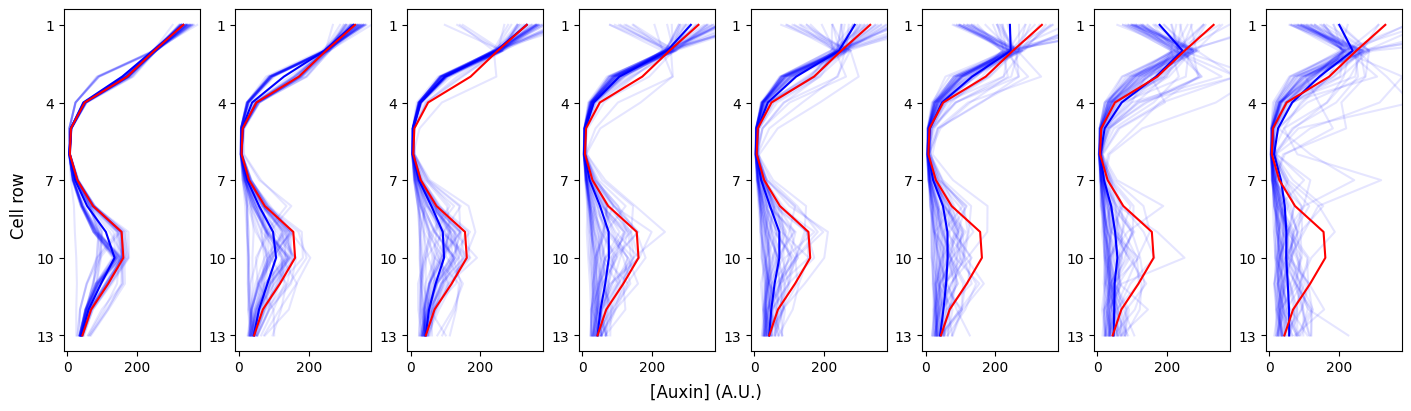

In [377]:
# Individual composite plot for UTGeff

fig3, axes = plt.subplots(1,8, figsize=(14,4), constrained_layout=True)
for data, ax in zip(data_UTGeff, axes.ravel()):
    for col in data.drop(columns=['model', 'noise', 'x']):
        ax.plot(data[col], data['x'], color='blue', alpha=.1)
for mean, ax in zip(all_means_UTGeff, axes.ravel()):
    ax.plot(mean, data_x, color='blue')
for ax in axes.ravel():
    ax.plot(UTGeff_single['0'], data_x, color='red')
for ax in axes.ravel():    
    ax.set_yticks([1,4,7,10,13])
    ax.invert_yaxis()
    ax.set_xlim(-10,380)   
fig3.supxlabel('[Auxin] (A.U.)')
fig3.supylabel('Cell row')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_comapre.png', bbox_inches='tight')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_compare.svg', bbox_inches='tight')

plt.show()

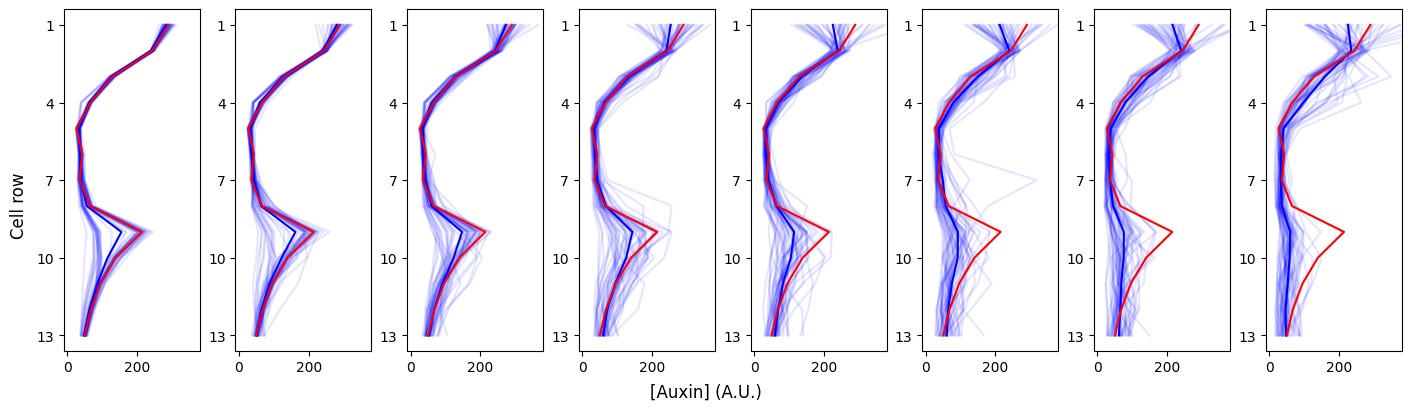

In [378]:
# Individual composite plot for DUAL

fig3, axes = plt.subplots(1,8, figsize=(14,4), constrained_layout=True)
for data, ax in zip(data_DUAL, axes.ravel()):
    for col in data.drop(columns=['model', 'noise', 'x']):
        ax.plot(data[col], data['x'], color='blue', alpha=.1)
for mean, ax in zip(all_means_DUAL, axes.ravel()):
    ax.plot(mean, data_x, color='blue')
for ax in axes.ravel():
    ax.plot(DUAL_single['0'], data_x, color='red')
for ax in axes.ravel():    
    ax.set_yticks([1,4,7,10,13])
    ax.invert_yaxis()
    ax.set_xlim(-10,380)   
fig3.supxlabel('[Auxin] (A.U.)')
fig3.supylabel('Cell row')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_comapre.png', bbox_inches='tight')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_compare.svg', bbox_inches='tight')

plt.show()

In [379]:
# Characterize peaks UTGeff
# Iterate over samples and replicates and extract metrics from the auxin site(s) that form(s) on the margin

def characterize_peaks(model, data):
    '''docstring'''

    all_peaks = pd.DataFrame(columns=['model', 'noise', 'sample', 'replica', 'pos', 'amplitude'])

    for sample_id, sample in enumerate(data):
        noise = noise_levels[sample_id]
        for replica in sample.drop(columns=['model', 'noise', 'x']):

            # Find pos a value of cell row with lowest auxin
            min_val = sample[replica].min()
            
            peaks = list(find_peaks(sample[replica], height = 1, threshold = 1, distance = 1))
            if len(peaks[0]) == 0:
                pass
            if len(peaks[0]) == 1:
                peak_position = data[0]['x'][peaks[0][0]] #peak_pos = sample['x'][peaks[0][0]]
                peak_height = peaks[1]['peak_heights'][0]
                all_peaks = all_peaks.append(pd.DataFrame({'model': model, 'noise': noise, 'sample': sample_id, 'replica': replica, 'pos': float(peak_position), 'amplitude': peak_height - min_val}, index=[0]), ignore_index=True)
            if len(peaks[0]) > 1:
                # Select peak with highest amplitude, excluding the peak that represents the tip of the leaf (cell row)
                # If distal auxin site (rows 0, 1, 2, 3) is detected as peak, remove it from the list of peaks. 
                if peaks[0][0] < 4:
                    peaks[0] = np.delete(peaks[0], 0)
                    peaks[1]['peak_heights'] = np.delete(peaks[1]['peak_heights'], 0)
                # Select highest peak
                max_height_value = np.amax(peaks[1]['peak_heights'])
                max_height_index = np.argmax(peaks[1]['peak_heights'])
                position = peaks[0][max_height_index]+1
                all_peaks = all_peaks.append(pd.DataFrame({'model': model, 'noise': noise, 'sample': sample_id, 'replica': replica, 'pos': float(position), 'amplitude': max_height_value - min_val}, index=[0]), ignore_index=True)
            
            troughs = list(find_peaks(-sample[replica], height = 1, threshold = 1, distance = 1))

    #all_peaks['pos'] = all_peaks['pos'].astype(int)
    #all_peaks[all_peaks['sample'] == 0]
    return(all_peaks)

In [380]:
peaks_UTGeff = characterize_peaks('UTGeff', data_UTGeff)
peaks_UTGeff

,model,noise,sample,replica,pos,amplitude
0,UTGeff,2.5,0,0,10.0,151.347715
1,UTGeff,2.5,0,1,10.0,131.590751
2,UTGeff,2.5,0,2,10.0,127.769450
3,UTGeff,2.5,0,3,10.0,133.116355
4,UTGeff,2.5,0,4,9.0,135.589932
...,...,...,...,...,...,...
380,UTGeff,20.0,7,45,7.0,217.396842
381,UTGeff,20.0,7,46,12.0,85.098978
382,UTGeff,20.0,7,47,8.0,32.525823
383,UTGeff,20.0,7,48,11.0,87.237234


In [381]:
peaks_DUAL = characterize_peaks('DUAL', data_DUAL)
peaks_DUAL

,model,noise,sample,replica,pos,amplitude
0,DUAL,2.5,0,0,9.0,25.094756
1,DUAL,2.5,0,1,9.0,186.199288
2,DUAL,2.5,0,2,9.0,175.218218
3,DUAL,2.5,0,3,9.0,173.190529
4,DUAL,2.5,0,4,9.0,189.165513
...,...,...,...,...,...,...
389,DUAL,20.0,7,45,9.0,36.725002
390,DUAL,20.0,7,46,10.0,30.645817
391,DUAL,20.0,7,47,9.0,45.667837
392,DUAL,20.0,7,48,9.0,41.118026


In [382]:
peaks_all = pd.concat([peaks_UTGeff, peaks_DUAL])

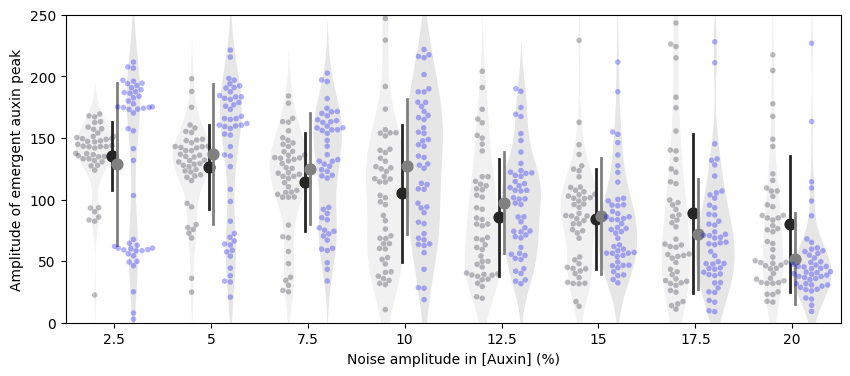

In [385]:
# Graph amplitude of peaks both models together

fig4, ax = plt.subplots(1,1, figsize=(10,4))
ax.set_ylim(0, 250)
sns.violinplot(data=peaks_all, x='sample', y=peaks_all.amplitude, hue=peaks_all.model, dodge=True, alpha=0.3, linewidth=0, color=(.9, .9, .9))
sns.pointplot(data=peaks_all, x='sample', y=peaks_all.amplitude, hue=peaks_all.model, dodge=True, ci='sd', linewidth=0, capsize=0, join=False, color='gray', scale=1, errwidth=2)
sns.swarmplot(data=peaks_all, x='sample', y=peaks_all.amplitude, hue=peaks_all.model, dodge=True, alpha=0.3, color='blue', size=4)
ax.set_ylabel('Amplitude of emergent auxin peak')
ax.set_xlabel('Noise amplitude in [Auxin] (%)')
ax.set_xticklabels(noise_levels)
ax.get_legend().remove()
plt.show()

In [389]:
# Graph amplitude of peaks

def plot_amplitude_single_model(data):
    fig4, ax = plt.subplots(1,1, figsize=(6,4))
    ax.set_ylim(0, 250)
    sns.violinplot(data=data, x='sample', y=data.amplitude, alpha=0.3, size=3, linewidth=0, color=(.9, .9, .9))
    sns.pointplot(data=data, x='sample', y=data.amplitude, ci='sd', linewidth=0, capsize=0, join=False, color='gray', scale=1, errwidth=2)
    sns.swarmplot(data=data, x='sample', y=data.amplitude, alpha=0.3, color='blue', size=4)
    ax.set_ylabel('Amplitude of emergent auxin peak')
    ax.set_xlabel('Noise amplitude in [Auxin] (%)')
    ax.set_xticklabels(noise_levels)
    plt.show()

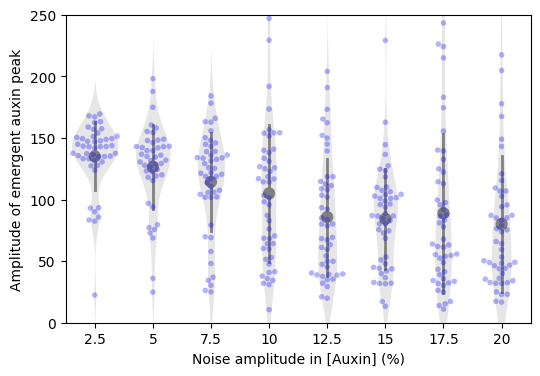

In [390]:
plot_amplitude_single_model(peaks_UTGeff)

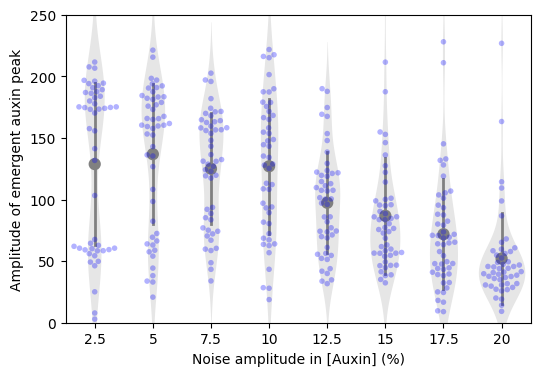

In [392]:
plot_amplitude_single_model(peaks_DUAL)

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (8).

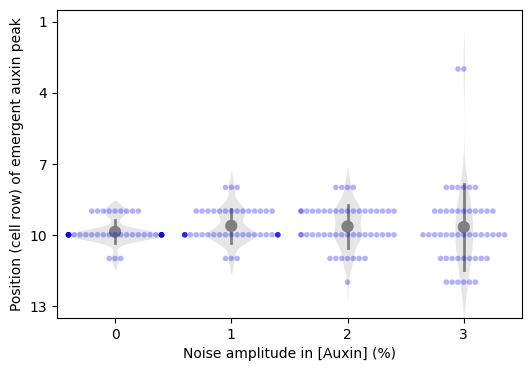

In [391]:
# Graph position of peaks

fig5, ax = plt.subplots(1,1, figsize=(6,4))
ax.set_ylim(.5, 13.5)
ax.invert_yaxis()
ax.set_yticks([1,4,7,10,13])
sns.violinplot(data=all_peaks_wt, x='sample', y=all_peaks_wt.pos, alpha=0.25, size=3, linewidth=0, color=(.9, .9, .9))
sns.pointplot(data=all_peaks_wt, x='sample', y=all_peaks_wt.pos, ci='sd', capsize=0, join=False, color='gray', scale=1, errwidth=2)
sns.swarmplot(data=all_peaks_wt, x='sample', y=all_peaks_wt.pos, alpha=0.3, color='blue', size=4)
ax.set_ylabel('Position (cell row) of emergent auxin peak')
ax.set_xlabel('Noise amplitude in [Auxin] (%)')
ax.set_xticklabels(noise_levels)
plt.show()